In [6]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [7]:
#image direction

train_dir = r"D:\Polinema\Tugas Kuliah\Semester 5\Machine Learning\Jobsheet4\images\training"
train_dir = r"D:\Polinema\Tugas Kuliah\Semester 5\Machine Learning\Jobsheet4\images\test"

In [8]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [9]:
# Load training data
train_img = load_dataset(train_dir)

In [10]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[140, 185, 227],
         [143, 188, 230],
         [143, 188, 230],
         ...,
         [158, 200, 238],
         [158, 200, 238],
         [155, 197, 235]],
 
        [[146, 191, 233],
         [148, 193, 235],
         [148, 193, 235],
         ...,
         [161, 203, 241],
         [161, 203, 241],
         [159, 201, 239]],
 
        [[143, 188, 230],
         [146, 191, 233],
         [145, 190, 232],
         ...,
         [159, 201, 239],
         [159, 201, 239],
         [156, 198, 236]],
 
        ...,
 
        [[ 71,  74,  67],
         [ 70,  73,  66],
         [ 69,  72,  65],
         ...,
         [ 72,  78,  90],
         [ 71,  77,  89],
         [ 71,  77,  89]],
 
        [[ 68,  70,  65],
         [ 82,  84,  79],
         [ 72,  74,  69],
         ...,
         [ 73,  81,  94],
         [ 72,  80,  93],
         [ 71,  79,  92]],
 
        [[ 72,  74,  69],
         [ 85,  87,  82],
         [ 74,  76,  71],
         ...,
         [ 73,  81,  94],
  

In [11]:
#Random size checking
pick_random = np.random.randint(0, len(train_img))

#Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 94
(614, 857, 3)


In [12]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (471, 640, 3)
Label	: D:\Polinema\Tugas Kuliah\Semester 5\Machine Learning\Jobsheet4\images\test\day


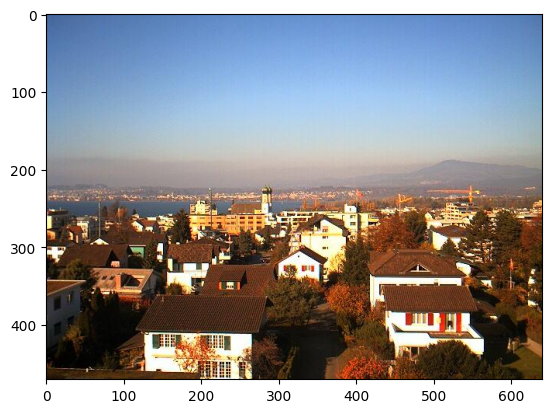

In [13]:
random_img_viz(train_img)

Langkah 3

In [14]:
def standarized_input(image):
    #resize to w: 1100, h:600
    std_img = cv2.resize(image,(1100,600))

    return std_img

In [15]:
def label_encoder(label):
    #encode the label
    #day as 1; night as 0
    num_val = 0

    if(label=='day'):
        num_val = 1
    
    return num_val

In [16]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        #Standarized the image
        std_img = standarized_input(image)

        #create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [17]:
train_std_img_list = preprocess(train_img)

In [19]:
#Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

#Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 61
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


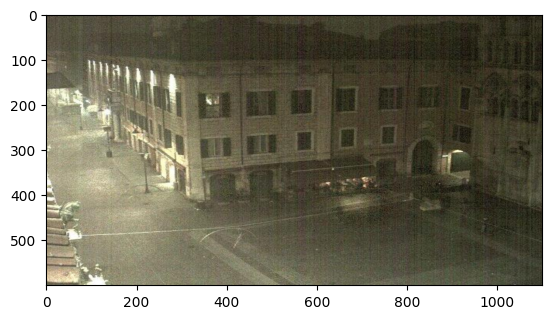

In [20]:
random_img_viz(train_std_img_list)

Langkah 4

In [22]:
#Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    #convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    #Calculate the avvg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2])# take the 3rb value which is the V channel
    area = image.shape[0]*image.shape[1]
    avg = sum_brightness / area

    return avg

Image 4
Avg Brighness: 188.1197


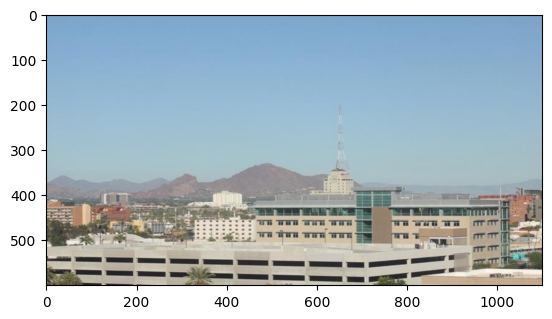

In [23]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)